In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

In [80]:
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt


In [81]:
data = pd.read_csv('com_data/com_data_20250502_035859_619.csv')
print(data.shape)
data.head()

(1383364, 2)


,Timestamp,COM_Data
0,2025-05-02 03:58:59.622,523
1,2025-05-02 03:58:59.622,523
2,2025-05-02 03:58:59.622,526
3,2025-05-02 03:58:59.622,523
4,2025-05-02 03:58:59.622,526


In [82]:
data = data.copy()
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [83]:

print(data['Timestamp'].min())
print(data['Timestamp'].max())


2025-05-02 03:58:59.622000
2025-05-02 05:59:02.048000


(960, 2)


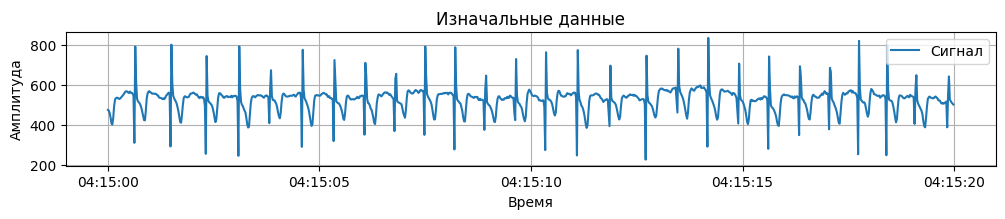

In [84]:
filtered_data = data[(data['Timestamp'] > '2025-05-02 04:15:00') & (data['Timestamp'] < '2025-05-02 04:15:20')]
filtered_data = filtered_data[0::4].reset_index(drop=True) # Сбрасываем индекс

print(filtered_data.shape)

x = filtered_data['Timestamp']
y = filtered_data['COM_Data']

plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Изначальные данные")
plt.legend()
plt.grid(True)
plt.show()

# Декомпозиция данных

In [85]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=10)
y = decomposition.resid

# Определение пиков

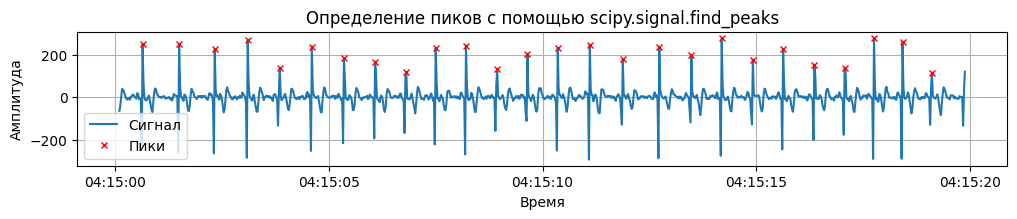

In [90]:
peaks, _ = find_peaks(y, height=80, distance=10, prominence=100)

# Визуализируем результаты
plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.plot(x[peaks], y[peaks], "x", color='red', label="Пики", markersize=5)
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Определение пиков с помощью scipy.signal.find_peaks")
plt.legend()
plt.grid(True)
plt.show()


# Создание регрессии для дальнейшего определения выбросов

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(x.values.reshape(-1, 1))

# Обучение модели
model = LinearRegression()
model.fit(X_poly, x)

# Предсказание
y_pred = model.predict(X_poly)

# Визуализация
plt.figure(figsize=(15, 5))
plt.plot(filtered_data['Timestamp'], y, color='blue', alpha=0.5, label='Исходные данные')
plt.plot(filtered_data['Timestamp'], y_pred, color='red', label='Регрессия')
plt.xlabel('Время')
plt.ylabel('COM_Data')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'PolynomialFeatures' is not defined

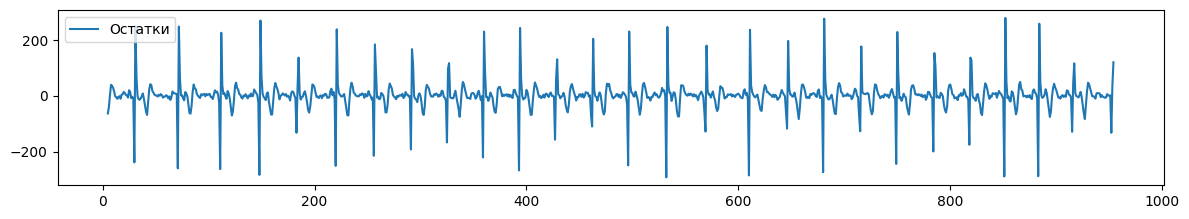

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(y, label='Остатки')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

